In [94]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [95]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [96]:
root = "/content/drive/MyDrive/Computer Vision Project 1/"

In [97]:
face_cascade = cv2.CascadeClassifier(os.path.join(root, 'haarcascade_frontalface_default.xml'))

### CelebA Dataset - 5 Classes

In [98]:
num_classes = 5

In [99]:
images = []
labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'CelebA/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            images.append(face)
            labels.append(i)
            break

In [100]:

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Extract SIFT features and descriptors from each image
all_kp = []
all_desc = []
for img in images:
    kp, desc = sift.detectAndCompute(img, None)
    all_kp.append(kp)
    all_desc.append(desc)

# Stack all the descriptors vertically to form a database of SIFT descriptors
sift_database = np.vstack(all_desc)

# Save the database to a file
np.save("sift_database.npy", sift_database)

In [101]:
test_images = []
test_labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'CelebA/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files[1:]:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            test_images.append(face)
            test_labels.append(i)

In [102]:
sift = cv2.SIFT_create(nfeatures=1000)
bf = cv2.BFMatcher()
db_desc = np.load("sift_database.npy")

predictions = []

for i in range(len(test_images)):
    kp_test, desc_test = sift.detectAndCompute(test_images[i], None)
    
    # Match the SIFT descriptors from the test image against the database descriptors using the Brute-Force Matcher
    matches = bf.knnMatch(desc_test, db_desc, k=2)

    # Apply ratio test to filter out spurious matches
    good_matches = []
    for m, n in matches:
        if m.distance <  0.7 * n.distance:
            good_matches.append(m)

    # Get the indices of the matched database descriptors
    matched_indices = [m.trainIdx for m in good_matches]


    # Get the number of matches for each person in the group photo
    matches_count = np.zeros(num_classes)
    for idx in matched_indices:
        matches_count[idx // 128] += 1

    # Get the index of the person with the most matches
    max_idx = np.argmax(matches_count)

    predictions.append(max_idx)

In [103]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.41      0.76      0.54        25
           1       0.00      0.00      0.00         5
           2       0.57      0.68      0.62        19
           3       0.08      0.05      0.06        21
           4       0.00      0.00      0.00        18

    accuracy                           0.38        88
   macro avg       0.21      0.30      0.24        88
weighted avg       0.26      0.38      0.30        88



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
accuracy_score(test_labels, predictions)

0.375

True Label 0
Predicted Label 1


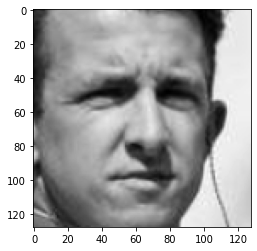

In [110]:
ind = 4
print("True Label", test_labels[ind])
print("Predicted Label", predictions[ind])
plt.imshow(test_images[ind], cmap="gray")
plt.show()

### CelebA Dataset - 10 Classes

In [76]:
num_classes = 10

In [77]:
images = []
labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'CelebA/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            images.append(face)
            labels.append(i)
            break

In [78]:

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Extract SIFT features and descriptors from each image
all_kp = []
all_desc = []
for img in images:
    kp, desc = sift.detectAndCompute(img, None)
    all_kp.append(kp)
    all_desc.append(desc)

# Stack all the descriptors vertically to form a database of SIFT descriptors
sift_database = np.vstack(all_desc)

# Save the database to a file
np.save("sift_database.npy", sift_database)

In [79]:
test_images = []
test_labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'CelebA/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files[1:]:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            test_images.append(face)
            test_labels.append(i)

In [80]:
sift = cv2.SIFT_create(nfeatures=1000)
bf = cv2.BFMatcher()
db_desc = np.load("sift_database.npy")

predictions = []

for i in range(len(test_images)):
    kp_test, desc_test = sift.detectAndCompute(test_images[i], None)
    
    # Match the SIFT descriptors from the test image against the database descriptors using the Brute-Force Matcher
    matches = bf.knnMatch(desc_test, db_desc, k=2)

    # Apply ratio test to filter out spurious matches
    good_matches = []
    for m, n in matches:
        if m.distance <  0.7 * n.distance:
            good_matches.append(m)

    # Get the indices of the matched database descriptors
    matched_indices = [m.trainIdx for m in good_matches]


    # Get the number of matches for each person in the group photo
    matches_count = np.zeros(num_classes)
    for idx in matched_indices:
        matches_count[idx // 128] += 1

    # Get the index of the person with the most matches
    max_idx = np.argmax(matches_count)

    predictions.append(max_idx)

In [81]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.24      0.80      0.37        25
           1       0.00      0.00      0.00         5
           2       0.40      0.53      0.45        19
           3       0.06      0.05      0.05        21
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        10
           6       0.10      0.05      0.06        21
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00        17

    accuracy                           0.20       160
   macro avg       0.08      0.14      0.09       160
weighted avg       0.11      0.20      0.13       160



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
accuracy_score(test_labels, predictions)

0.2

### Custom Dataset

In [65]:
num_classes = 4

In [67]:
images = []
labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'Custom Dataset/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            images.append(face)
            labels.append(i)
            break

In [68]:

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Extract SIFT features and descriptors from each image
all_kp = []
all_desc = []
for img in images:
    kp, desc = sift.detectAndCompute(img, None)
    all_kp.append(kp)
    all_desc.append(desc)

# Stack all the descriptors vertically to form a database of SIFT descriptors
sift_database = np.vstack(all_desc)

# Save the database to a file
np.save("sift_database.npy", sift_database)

In [71]:
test_images = []
test_labels = []
for i in range(num_classes):
    label_path = os.path.join(root, f'Custom Dataset/data/{i+1}')
    files = os.listdir(label_path)
    for file_name in files[1:]:
        img = cv2.imread(os.path.join(label_path, file_name), cv2.IMREAD_GRAYSCALE)
        faces_bound = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        if len(faces_bound) > 0:
            (x, y, w, h) = faces_bound[0]
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (128, 128))
            test_images.append(face)
            test_labels.append(i)

In [72]:
sift = cv2.SIFT_create(nfeatures=1000)
bf = cv2.BFMatcher()
db_desc = np.load("sift_database.npy")

predictions = []

for i in range(len(test_images)):
    kp_test, desc_test = sift.detectAndCompute(test_images[i], None)
    
    # Match the SIFT descriptors from the test image against the database descriptors using the Brute-Force Matcher
    matches = bf.knnMatch(desc_test, db_desc, k=2)

    # Apply ratio test to filter out spurious matches
    good_matches = []
    for m, n in matches:
        if m.distance <  0.7 * n.distance:
            good_matches.append(m)

    # Get the indices of the matched database descriptors
    matched_indices = [m.trainIdx for m in good_matches]


    # Get the number of matches for each person in the group photo
    matches_count = np.zeros(num_classes)
    for idx in matched_indices:
        matches_count[idx // 128] += 1

    # Get the index of the person with the most matches
    max_idx = np.argmax(matches_count)

    predictions.append(max_idx)

In [74]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       0.48      0.93      0.63        40
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        50

    accuracy                           0.44       167
   macro avg       0.35      0.48      0.40       167
weighted avg       0.31      0.44      0.36       167



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
accuracy_score(test_labels, predictions)

0.437125748502994